In [1]:
# As usual, a bit of setup

import time
import numpy as np
import matplotlib.pyplot as plt
from metropolis_hastings import *
from deciphering_utils import *
import sys  

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


In [3]:
filename = "data/warpeace_input.txt"
char_to_ix, ix_to_char, tr, fr = compute_statistics(filename)

filename_2 = "data/shakespeare_input.txt"
char_to_ix_2, ix_to_char_2, tr_2, fr_2 = compute_statistics(filename_2)

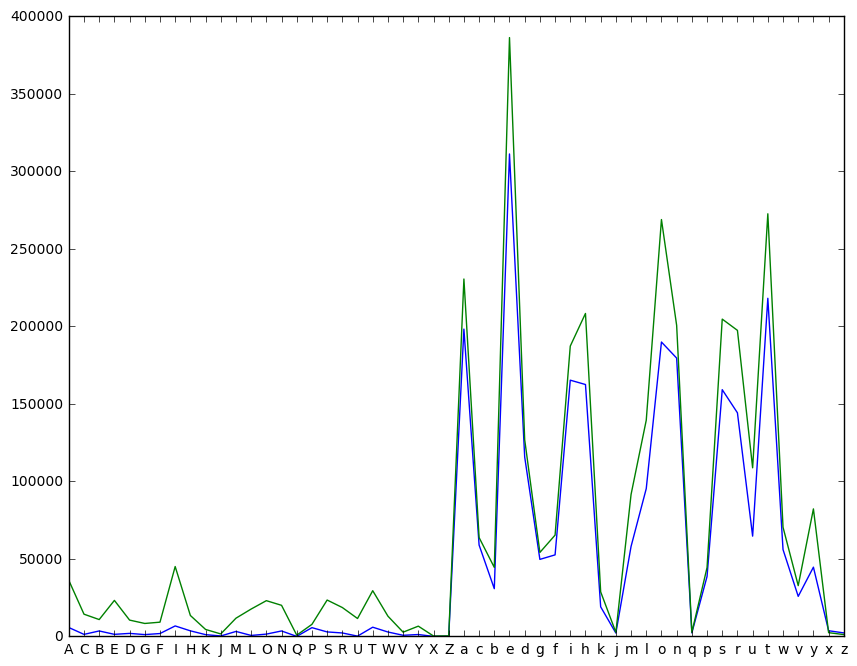

In [4]:
#plot the frequency statistics for characters
fr_stat = {}
fr_stat_2 = {}
chars = list('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ')
for c in chars:
    fr_stat[c] = fr[char_to_ix[c]]
    fr_stat_2[c] = fr_2[char_to_ix_2[c]]

plt.xticks(range(len(fr_stat)), fr_stat.keys())
plt.plot(range(len(fr_stat)), fr_stat.values())
plt.plot(range(len(fr_stat_2)), fr_stat_2.values())
plt.show()

#strong correlation shows that one of the texts can represent the other text.


In [8]:
#default text to work upon
t = list(open(filename, 'r').read()[100:200])

def pretty_print(text):
    print ''.join(text[1:500]),'...'

def test_scrambling_text_one_step(text):
    #generate an identity p_map
    p_map = generate_identity_p_map(char_to_ix.keys())
    #move the p_map one step
    p_map_n = move_one_step(p_map)
    
    scrambled_t = scramble_text(text, p_map_n)
    
    dict = {}
    for c1, c2 in zip(text, scrambled_t):
        if c1 != c2:
            dict[c1] = c2
            
    assert len(dict) <= 2
    
def test_log_probability_by_transition_counts():
    
    #take a really long text
    
    text = list(open(filename, 'r').read()[1:500000])
    p_map = generate_random_permutation_map(char_to_ix.keys())
    
    t1 = time.time()
    p1 = compute_log_probability(text, p_map, char_to_ix, fr, tr)
    t2 = time.time()
    del_t1 = t2-t1
    
    transtion_counts = compute_transition_counts(text, char_to_ix)
    
    t1 = time.time()
    p2 = compute_log_probability_by_counts(transtion_counts, text, p_map, char_to_ix, fr, tr)
    t2 = time.time()
    del_t2 = t2-t1
    
    print("%f times Speed up "%(del_t1/del_t2))
    print("p1 : ", p1, " p2 : ", p2)
    assert abs((p1-p2)) < 1e-5
    
test_scrambling_text_one_step(t)
test_log_probability_by_transition_counts()

3103.160226 times Speed up 
p1 :  -3072077.54556  p2 :  -3072077.54556


In [9]:
#prepare the sample
s = list(open(filename_2, 'r').read()[530:1000])

t = list(s)
p_map = generate_random_permutation_map(char_to_ix.keys())
p_map_reverse = {c: x for x, c in p_map.iteritems()}
scrambled_text = scramble_text(t, p_map)
p1 = compute_log_probability(scrambled_text, p_map, char_to_ix, fr, tr)
p2 = compute_log_probability(t, p_map, char_to_ix, fr, tr)

pretty_print(scrambled_text), pretty_print(t)
p1, p2



DUSv SfvULOdvg ufOkcdvu LE qLfKl OcKdcRc fu: dk vUcg
qLfKl gdcKl fu wfv vUc ufhcOkKfdvg, qUdKc dv qcOc
qULKcuLHc, qc HdIUv Ifcuu vUcg OcKdcRcl fu UfHSEcKg;
wfv vUcg vUdEP qc SOc vLL lcSO: vUc KcSEEcuu vUSv
SkkKdJvu fu, vUc LwZcJv Lk LfO HducOg, du Su SE
dERcEvLOg vL hSOvdJfKSOduc vUcdO SwfElSEJc; LfO
ufkkcOSEJc du S ISdE vL vUcH Ccv fu OcRcEIc vUdu qdvU
LfO hdPcu, cOc qc wcJLHc OSPcu: kLO vUc ILlu PELq T
uhcSP vUdu dE UfEIcO kLO wOcSl, ELv dE vUdOuv kLO OcRcEIc.

VcJLEl sdvdWcE:
DLfKl gLf hOLJ ...

What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.

Second Citizen:
Would you p

(-332664.3899607489, -324761.72514686204)

Entropy :  246035.875765 , Error :  -1 , Acceptance :  0.322580645161 Current state : boma mraotidag urikldau tO htrzf ilzdlcl ru: dk aolg
htrzf gdlzf ru pra aol urHlikzrdag, hodzl da hlil
hotzlutyl, hl ydsoa srluu aolg ilzdlclf ru orymOlzg;
pra aolg aodOe hl mil att flmi: aol zlmOOl...
Entropy :  203090.000414 , Error :  -1 , Acceptance :  0.138121546961 Current state : Duit irtuosetf nrsmletn oa horzg slzelpl rn: em tulf
horzg felzg rn vrt tul nrPlsmzretf, huezl et hlsl
huozlnoyl, hl yedut drlnn tulf slzelplg rn uryialzf;
vrt tulf tueab hl isl too glis: tul zliaal...
Entropy :  184199.396438 , Error :  -1 , Acceptance :  0.0769230769231 Current state : huit iatuorltm saryelts on woadf redleve as: ly tuem
woadf mledf as cat tue saperydaltm, wulde lt were
wuodesobe, we blgut gaess tuem redlevef as uabinedm;
cat tuem tulnz we ire too feir: tue deinne...
Entropy :  163828.211475 , Error :  -1 , Acceptance :  0.0350877192982 Current state : Hhat adthoritp sdrfeits on wodlg relieve ds: if 

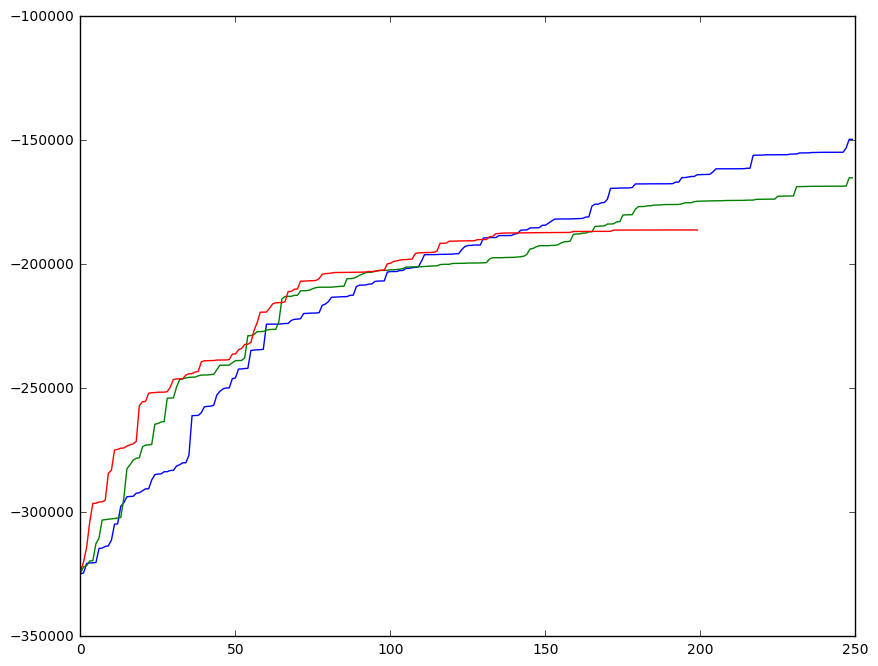

In [11]:
#time to run monte carlo
i = 0
initial_state = get_state(scrambled_text, tr, fr, char_to_ix)

while i < 3:
    state, lps, _ = metropolis_hastings(initial_state, propose_a_move, compute_probability_of_state, 
                                      iters=5000, print_every=500, tolerance=0.02, pretty_state=pretty_state)
    
    plt.plot(lps)
    i += 1

plt.show()